In [1]:
import numpy as np
import pandas as pd

In [2]:
personality_questions = pd.read_csv('cleaned_youngpeople_data.csv')

In [3]:
list(personality_questions.columns)

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

In [4]:
movies = personality_questions[[
    'Movies',
    'Horror',
    'Thriller',
    'Comedy',
    'Romantic',
    'Sci-fi',
    'War',
    'Fantasy/Fairy tales',
    'Animated',
    'Documentary',
    'Western',
    'Action'
]]
fear_of_darkness = personality_questions['Darkness']

In [5]:
pd.value_counts(personality_questions['Only child'])

no     734
yes    243
Name: Only child, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(movies, fear_of_darkness, train_size = 0.8)

print("X.shape:", movies.shape)
print("X_train.shape:", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("")
print("y.shape:      ", fear_of_darkness.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape: ", y_test.shape)
print("")

X.shape: (977, 12)
X_train.shape: (781, 12)
X_test.shape:  (196, 12)

y.shape:       (977,)
y_train.shape: (781,)
y_test.shape:  (196,)



In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn3.predict(X_test)
knn3.score(X_test, y_test)

0.37755102040816324

In [8]:
# training the data with n = 5 neighbours
from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn5.predict(X_test)
knn5.score(X_test, y_test)

0.413265306122449

In [9]:
from sklearn.metrics import confusion_matrix

print("K=3, confusion matrix:")
print(confusion_matrix(y_train, knn3.predict(X_train)))
print("")
print("K=5, confusion matrix:")
print(confusion_matrix(y_train, knn5.predict(X_train)))

K=3, confusion matrix:
[[212  38  11   3   1]
 [ 58 174   2   2   4]
 [ 39  33  53   0   1]
 [ 33  24   9  19   0]
 [ 28  21   6   1   9]]

K=5, confusion matrix:
[[199  50  11   5   0]
 [ 65 167   6   1   1]
 [ 40  40  39   6   1]
 [ 28  35   7  13   2]
 [ 19  28   6   2  10]]


In [10]:
from sklearn.model_selection import cross_val_score

mean_fold_errors = []

for num_neighbors in range(1, 30):
    np.random.seed(0)   # to ensure we use the same random folds

    knn = KNeighborsClassifier(num_neighbors)
    fold_errors = 1 - cross_val_score(knn, X_train, y_train, cv = 5)   # 5-fold CV
    mean_fold_errors.append(np.mean(fold_errors))

    print("")
    print("Num neighbors =", num_neighbors)
    print("K-fold CV errors:", np.round(fold_errors, 3))
    print("K-fold CV mean error:", np.round(mean_fold_errors[-1], 3))


Num neighbors = 1
K-fold CV errors: [0.72  0.654 0.692 0.686 0.724]
K-fold CV mean error: 0.695

Num neighbors = 2
K-fold CV errors: [0.707 0.628 0.654 0.654 0.673]
K-fold CV mean error: 0.663

Num neighbors = 3
K-fold CV errors: [0.707 0.667 0.654 0.654 0.679]
K-fold CV mean error: 0.672

Num neighbors = 4
K-fold CV errors: [0.701 0.718 0.667 0.692 0.686]
K-fold CV mean error: 0.693

Num neighbors = 5
K-fold CV errors: [0.694 0.686 0.667 0.692 0.699]
K-fold CV mean error: 0.688

Num neighbors = 6
K-fold CV errors: [0.669 0.647 0.641 0.699 0.673]
K-fold CV mean error: 0.666

Num neighbors = 7
K-fold CV errors: [0.713 0.641 0.641 0.692 0.679]
K-fold CV mean error: 0.673

Num neighbors = 8
K-fold CV errors: [0.662 0.628 0.615 0.641 0.673]
K-fold CV mean error: 0.644

Num neighbors = 9
K-fold CV errors: [0.669 0.622 0.622 0.647 0.679]
K-fold CV mean error: 0.648

Num neighbors = 10
K-fold CV errors: [0.688 0.679 0.609 0.673 0.667]
K-fold CV mean error: 0.663

Num neighbors = 11
K-fold CV

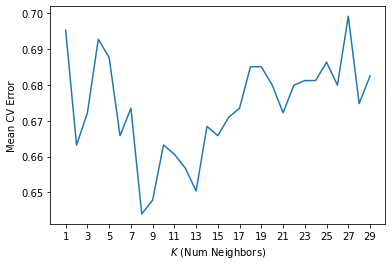

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(1,30), mean_fold_errors)
plt.xticks(range(1, 30, 2))
plt.xlabel('$K$ (Num Neighbors)')
plt.ylabel('Mean CV Error')
plt.show()

In [12]:
# fitting the model with n = 13
knn13 = KNeighborsClassifier(n_neighbors=13)
knn13.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn13.predict(X_test)
knn13.score(X_test, y_test)

0.41836734693877553

In [13]:
# confusion matrix
print("K=13, confusion matrix:")
print(confusion_matrix(y_test, knn13.predict(X_test)))

K=13, confusion matrix:
[[42 35  3  1  1]
 [14 34  2  0  1]
 [ 7 21  5  1  0]
 [ 6  8  3  1  0]
 [ 4  5  2  0  0]]


In [14]:
# unsurprisingly, knn didn't predict these things much better than random forest
# so they probably aren't very related variables
# look at fears and whether they're an only child
phobias = personality_questions[[
    'Flying',
    'Storm',
    'Darkness',
    'Heights',
    'Spiders',
    'Snakes',
    'Rats',
    'Ageing',
    'Dangerous dogs',
    'Fear of public speaking'
]]


personality_questions = personality_questions.replace(['no','yes'],[0,1])
only_child = personality_questions['Only child']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(phobias, only_child, train_size = 0.8)

print("X.shape:", phobias.shape)
print("X_train.shape:", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("")
print("y.shape:      ", only_child.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape: ", y_test.shape)
print("")

X.shape: (977, 10)
X_train.shape: (781, 10)
X_test.shape:  (196, 10)

y.shape:       (977,)
y_train.shape: (781,)
y_test.shape:  (196,)



In [16]:
# n = 3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn3.predict(X_test)
knn3.score(X_test, y_test)

0.6632653061224489

In [17]:
# n = 5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn5.predict(X_test)
knn5.score(X_test, y_test)

0.7040816326530612

In [18]:
print("K=3, confusion matrix:")
print(confusion_matrix(y_train, knn3.predict(X_train)))
print("")
print("K=5, confusion matrix:")
print(confusion_matrix(y_train, knn5.predict(X_train)))

K=3, confusion matrix:
[[539  40]
 [111  91]]

K=5, confusion matrix:
[[543  36]
 [145  57]]


In [19]:
mean_fold_errors = []

for num_neighbors in range(1, 30):
    np.random.seed(0)   # to ensure we use the same random folds

    knn = KNeighborsClassifier(num_neighbors)
    fold_errors = 1 - cross_val_score(knn, X_train, y_train, cv = 5)   # 5-fold CV
    mean_fold_errors.append(np.mean(fold_errors))

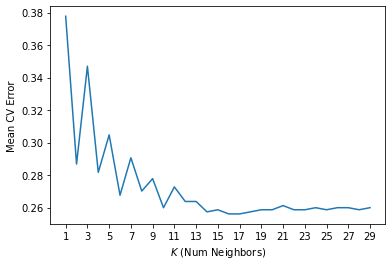

In [20]:
# plotting the error 

plt.plot(range(1,30), mean_fold_errors)
plt.xticks(range(1, 30, 2))
plt.xlabel('$K$ (Num Neighbors)')
plt.ylabel('Mean CV Error')
plt.show()

In [22]:
# fitting the model with n = 16
knn16 = KNeighborsClassifier(n_neighbors=16)
knn16.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn16.predict(X_test)
knn16.score(X_test, y_test)

0.7857142857142857

In [30]:
# confusion matrix
print("K=16, confusion matrix:")
print(confusion_matrix(y_test, knn16.predict(X_test)))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(

K=16, confusion matrix:
[[154   1]
 [ 41   0]]


NameError: name 'classifier' is not defined

In [27]:
only_child.value_counts()

0    734
1    243
Name: Only child, dtype: int64

In [29]:
734/(734+243)

0.7512794268167861

In [45]:
# look at how well phobias can predict how much someone likes horror movies
likes_horror_movies = personality_questions['Horror']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(phobias, likes_horror_movies, train_size = 0.8)

# n = 5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn5.predict(X_test)
knn5.score(X_test, y_test)

0.19387755102040816

In [25]:
print("K=5, confusion matrix:")
print(confusion_matrix(y_train, knn5.predict(X_train)))

K=5, confusion matrix:
[[137  19  22  10   8]
 [ 38  67  22  11  15]
 [ 51  27  80   4  11]
 [ 30  19  28  39  13]
 [ 32  21  25  12  40]]


In [26]:
mean_fold_errors = []

for num_neighbors in range(1, 30):
    np.random.seed(0)   # to ensure we use the same random folds

    knn = KNeighborsClassifier(num_neighbors)
    fold_errors = 1 - cross_val_score(knn, X_train, y_train, cv = 5)   # 5-fold CV
    mean_fold_errors.append(np.mean(fold_errors))

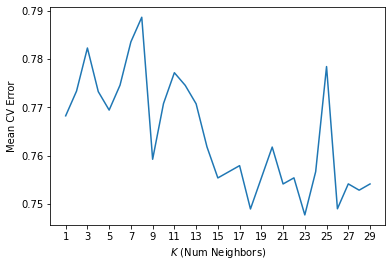

In [27]:
# plotting the error 

plt.plot(range(1,30), mean_fold_errors)
plt.xticks(range(1, 30, 2))
plt.xlabel('$K$ (Num Neighbors)')
plt.ylabel('Mean CV Error')
plt.show()

In [28]:
# fitting the model with n = 15
knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_train, y_train)

# testing the accuracy of the model
prediction = knn15.predict(X_test)
knn15.score(X_test, y_test)

0.21428571428571427

In [29]:
print("K=15, confusion matrix:")
print(confusion_matrix(y_test, knn15.predict(X_test)))

K=15, confusion matrix:
[[25  4 19  5  1]
 [17  4 15  1  3]
 [13  8  8  2  3]
 [22  6 11  2  1]
 [11  2  8  2  3]]
